In [1]:
import scipy
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm
from glob import glob

In [51]:
img_path = "../../models/detect_photoshop/examples/disney_swap/aziz_tunc.png"
# img = plt.imread(img_path)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

## median filter

In [52]:
filtered_img = median_filter(img, size=5)

Text(0.5, 1.0, 'median filtered')

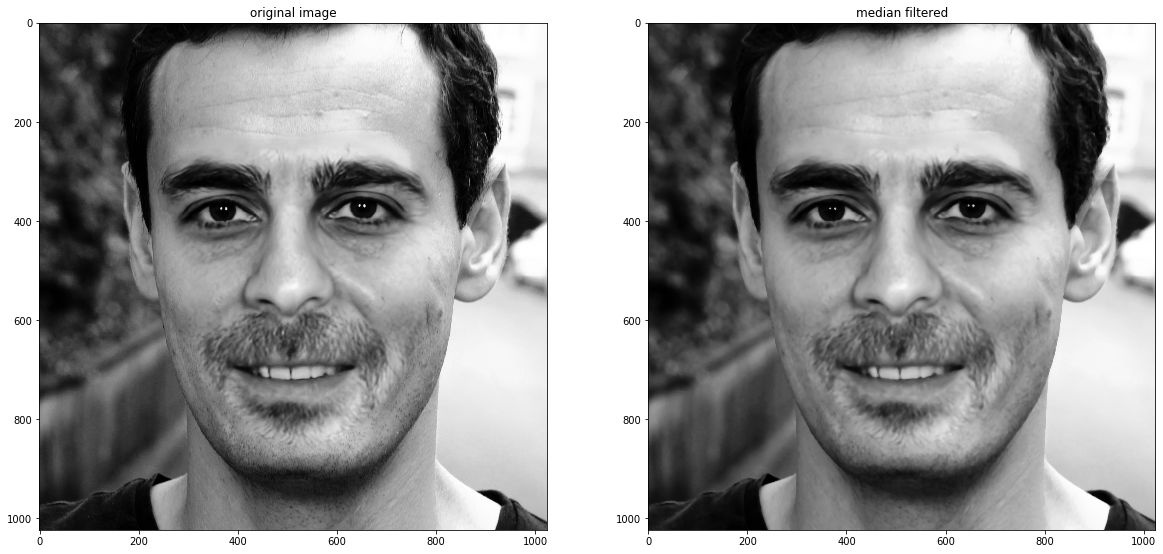

In [53]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("original image")
plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')
plt.title("median filtered")

## histogram equalisation

In [54]:
noise = img - filtered_img
equalised_noise = cv2.equalizeHist(noise)

Text(0.5, 1.0, 'equalised noise')

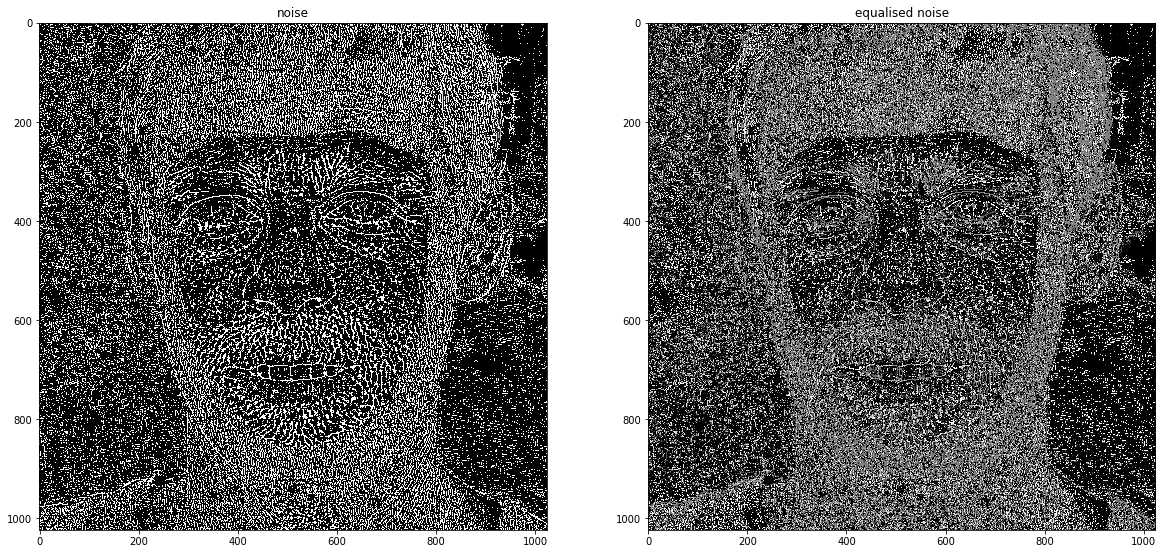

In [55]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(noise,cmap='gray')
plt.title("noise")
plt.subplot(1,2,2)
plt.imshow(equalised_noise, cmap='gray')
plt.title("equalised noise")

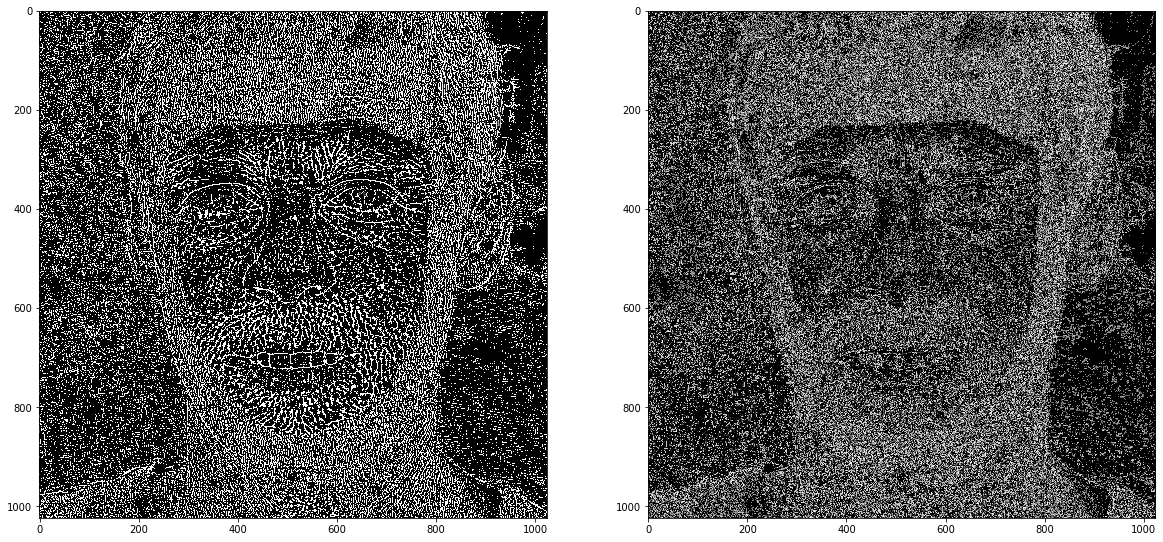

In [70]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(noise, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise*100, cmap='gray')

## yen's threshold

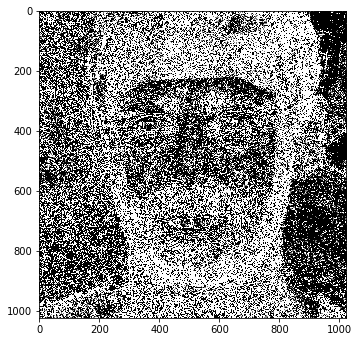

In [7]:
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave, imshow

img = imread(img_path)

yen_threshold = threshold_yen(noise)
bright = rescale_intensity(noise, (0, yen_threshold), (0, 255))
plt.figure(figsize=(5,5))
imshow(bright)

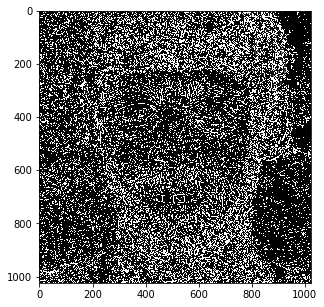

In [8]:
alpha = 1.95 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

manual_result = cv2.convertScaleAbs(noise, alpha=alpha, beta=beta)
plt.figure(figsize=(5,5))
plt.imshow(manual_result, cmap='gray')

In [9]:
nose_mean = np.mean(noise[500:550, 500:550])
print(nose_mean)

48.8644


In [10]:
forehead_mean = np.mean(noise[150:200, 500:550])
print(forehead_mean)

96.5404


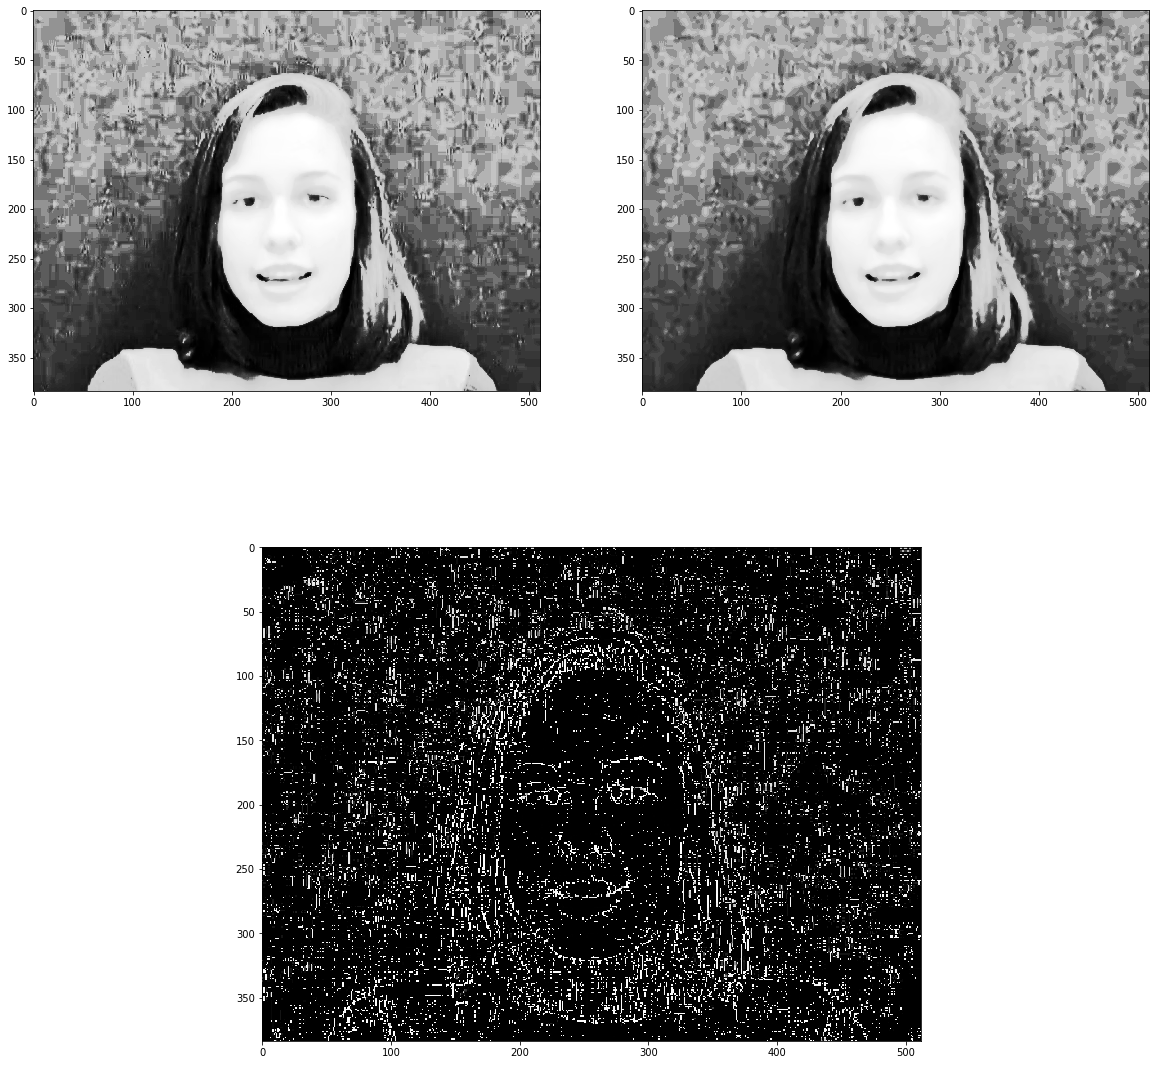

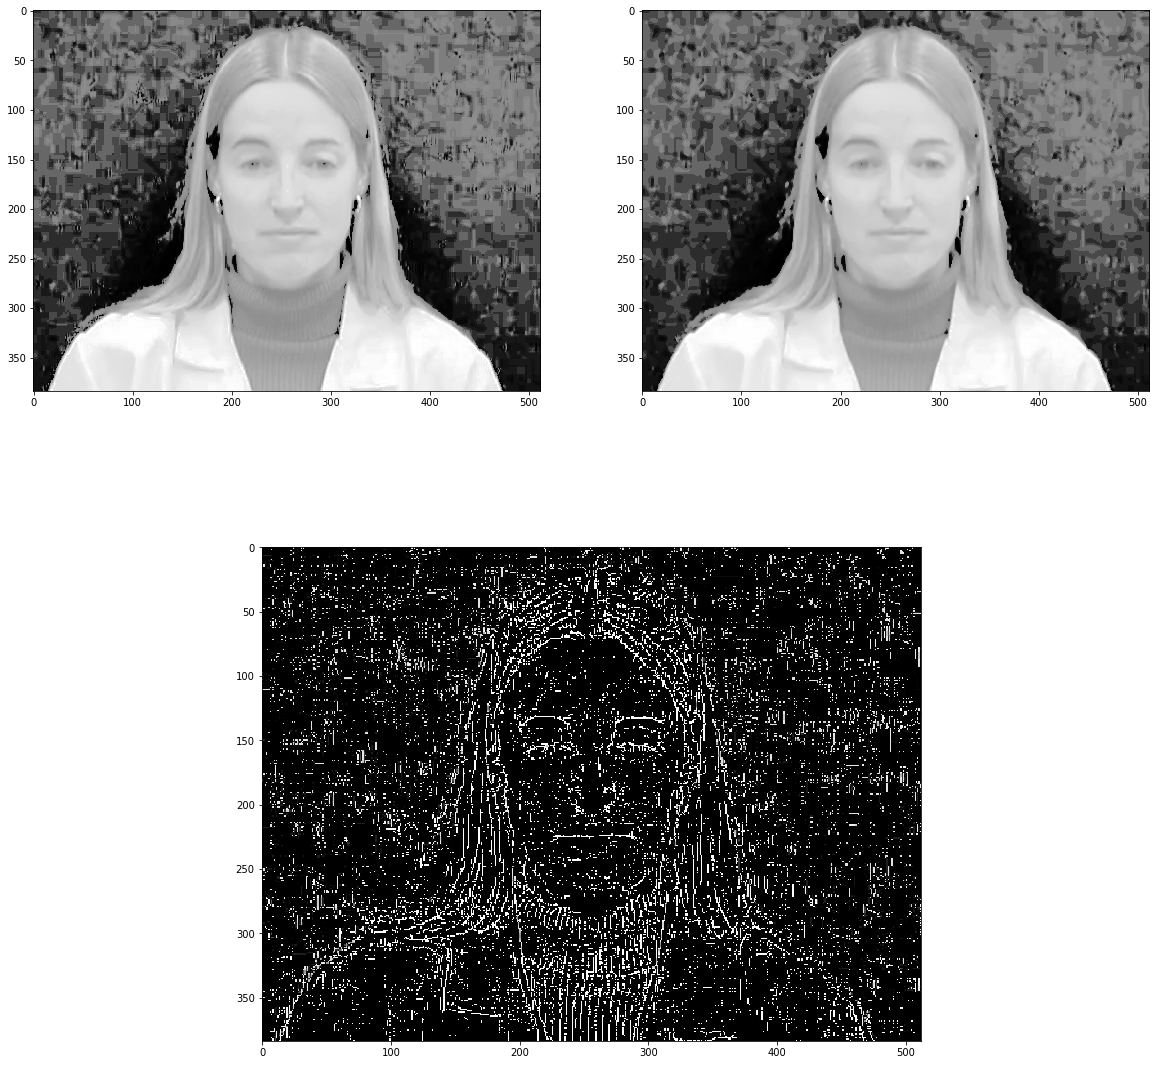

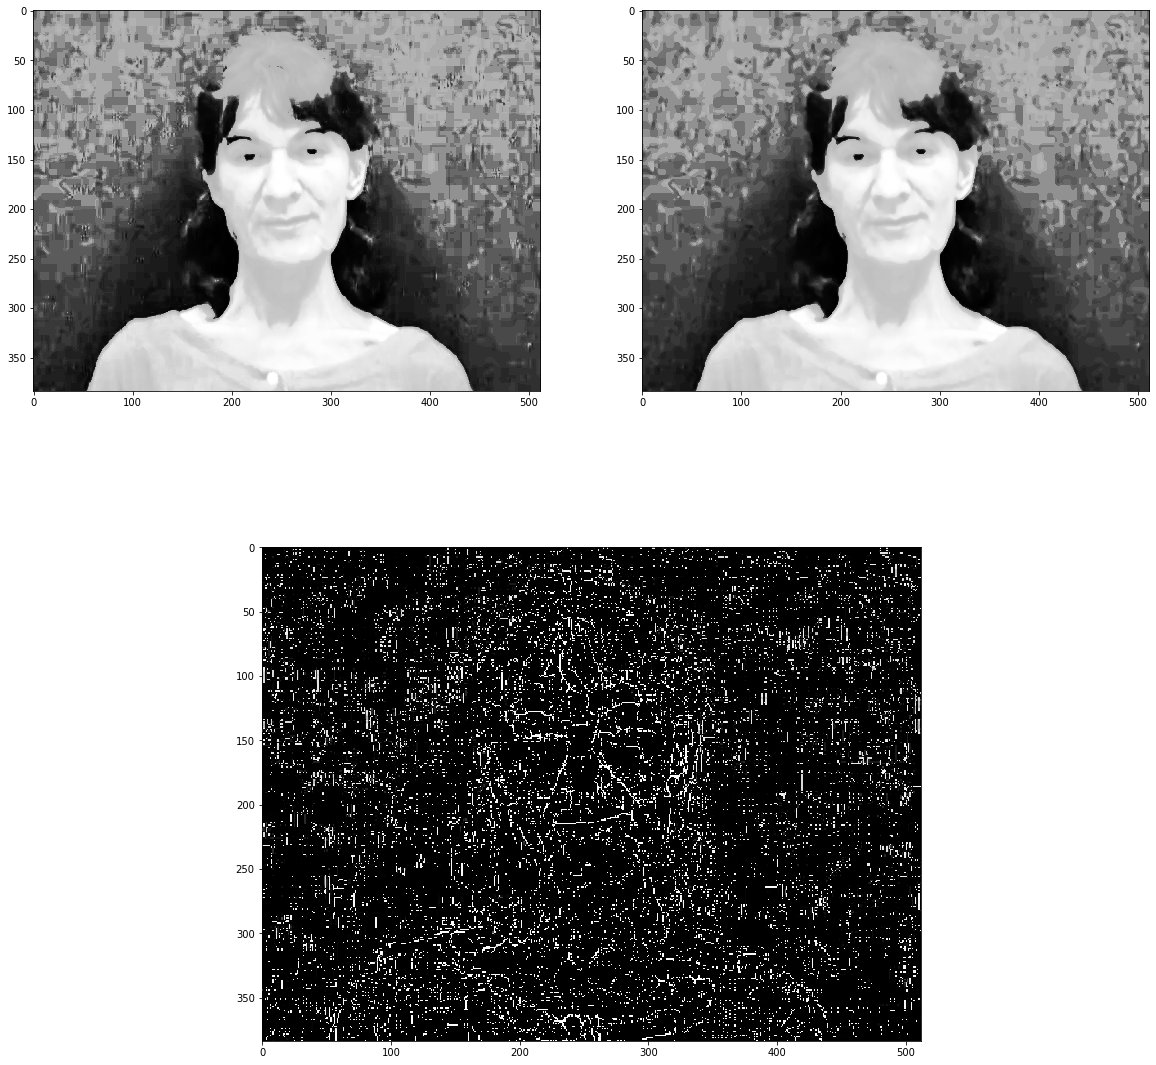

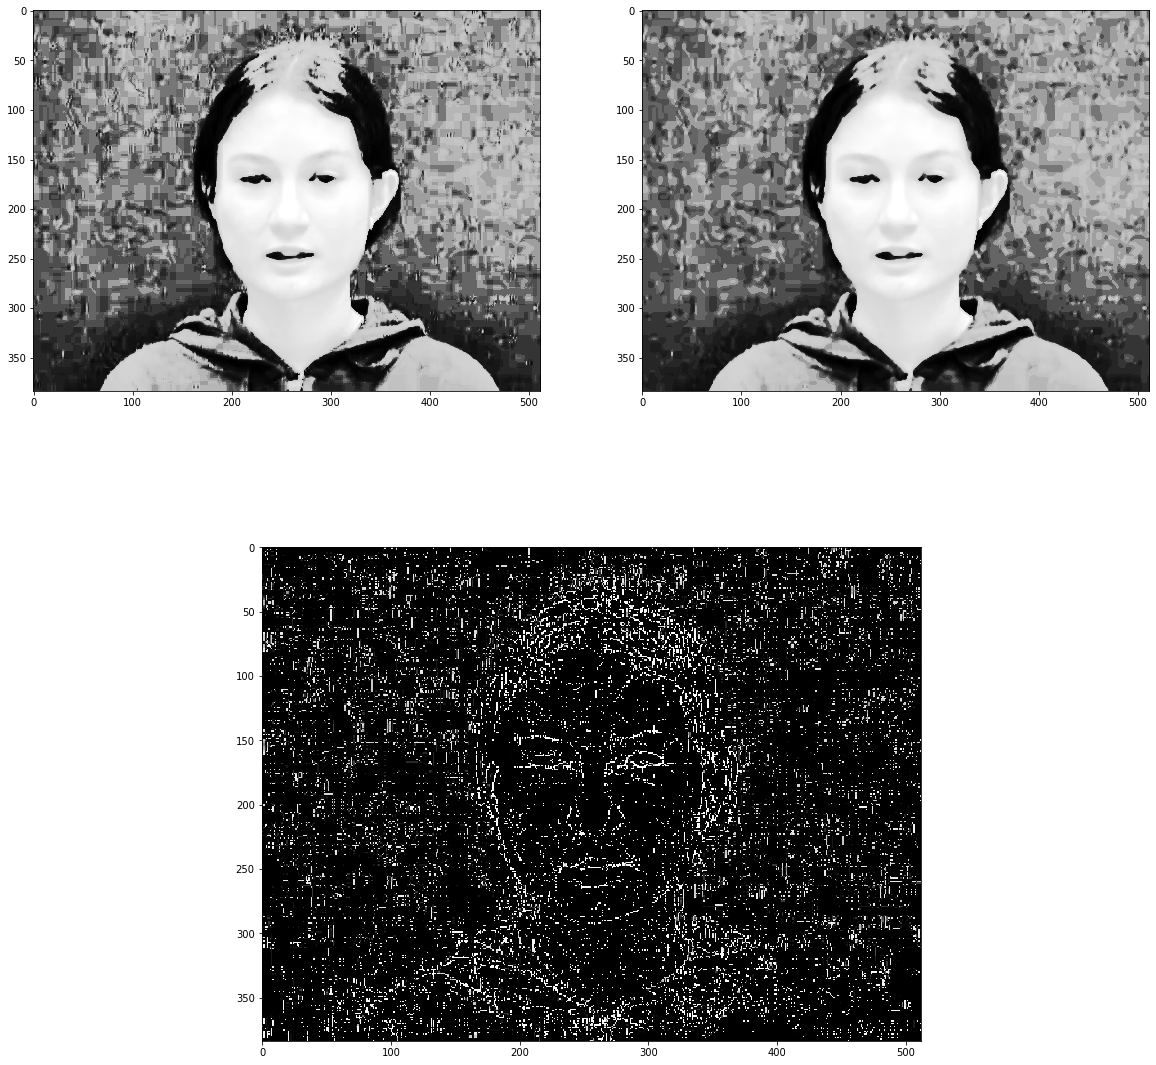

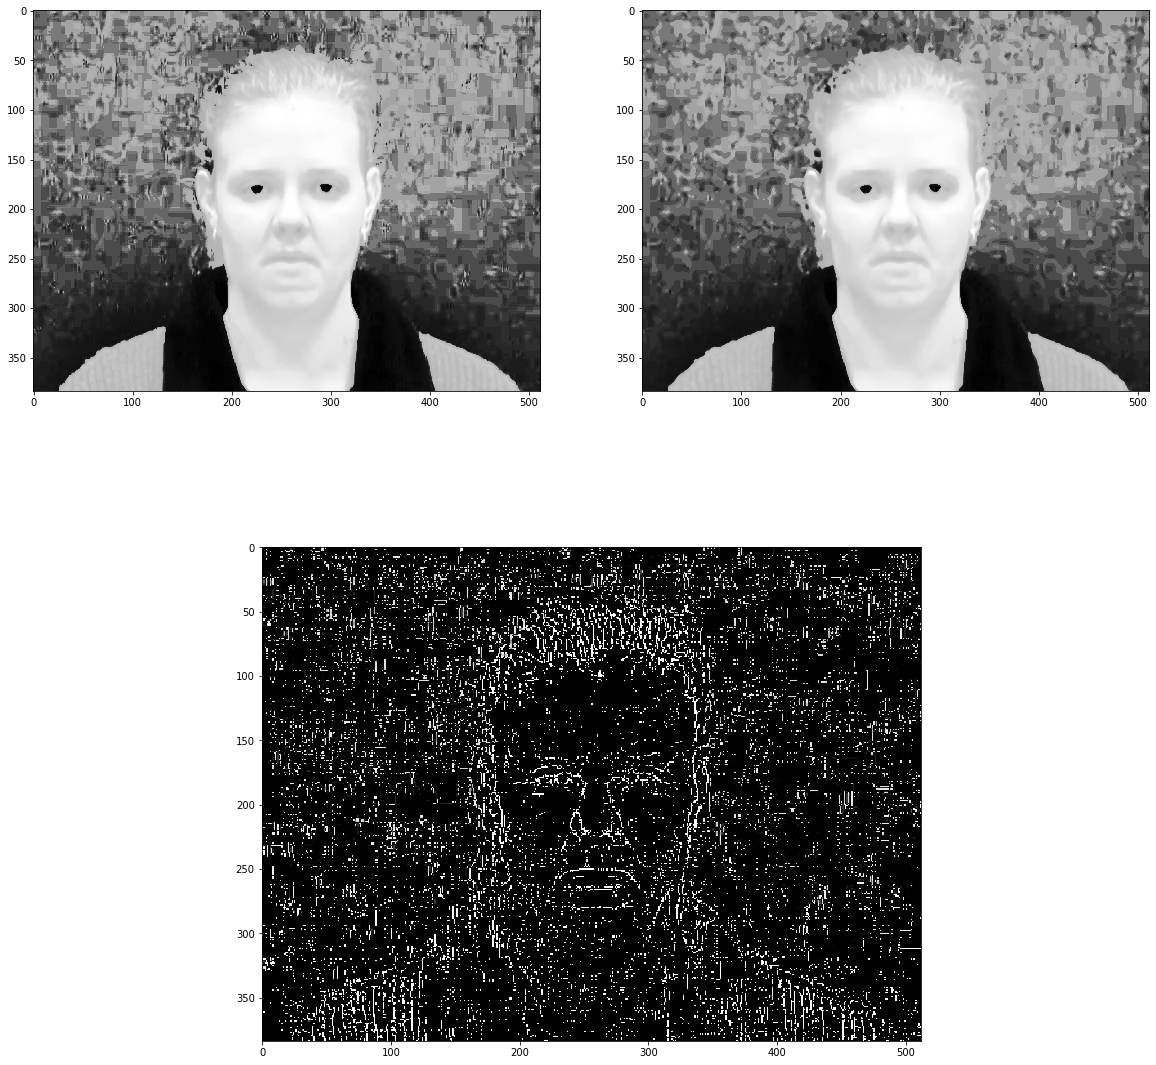

In [11]:
input_dir = "/home/shruti/deepfake-thesis/data/sample/frames/TIMIT/"

for frame_name in os.listdir(input_dir):
    frame_path = os.path.join(input_dir, frame_name)
    frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
    equalised_frame = cv2.equalizeHist(frame)
    filtered_frame = median_filter(equalised_frame, size=3)
    noise = equalised_frame - filtered_frame
    plt.figure(figsize=(20,20))
    plt.subplot(2,2,1)
    plt.imshow(equalised_frame, cmap='gray')
    plt.subplot(2,2,2)
    plt.imshow(filtered_frame, cmap='gray')
    plt.subplot(2,1,2)
    plt.imshow(noise, cmap='gray')

100%|██████████| 5/5 [00:01<00:00,  3.15it/s]


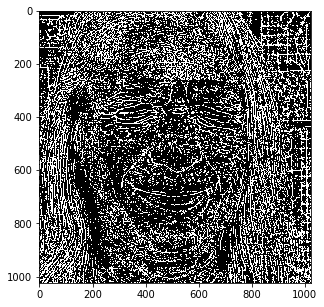

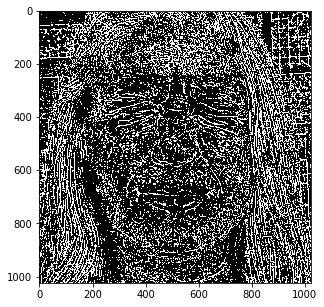

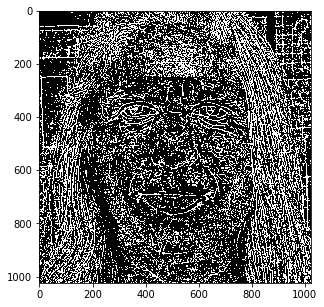

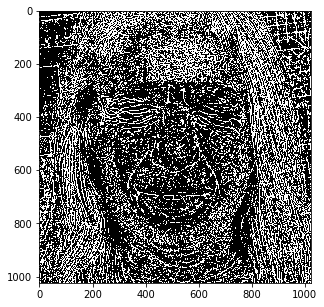

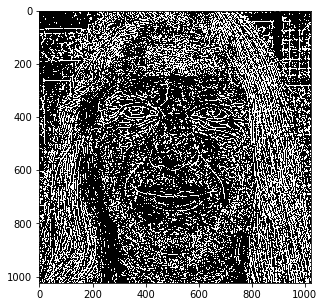

In [12]:
input_dir = "/home/shruti/deepfake-thesis/code/PyEVM/data/disney_swap/normed_frames/martina_jacek/"

for frame_name in tqdm(glob(input_dir + "*")[:5]):
    frame_path = os.path.join(input_dir, frame_name)
    frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
    equalised_frame = cv2.equalizeHist(frame)
    filtered_frame = median_filter(equalised_frame, size=5)
    noise = equalised_frame - filtered_frame
    yen_threshold = threshold_yen(noise)
    bright = rescale_intensity(noise, (0, yen_threshold), (0, 255))
    blur = cv2.GaussianBlur(noise,(5,5),0)
    ret3,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.figure(figsize=(5,5))
    plt.imshow(otsu, cmap='gray')

In [13]:
def ELA(image, quality, amplification, flatten=True):
    cv2.imwrite("compressed_img.jpg", image, [cv2.IMWRITE_JPEG_QUALITY, quality])
    compressed_image = cv2.imread("compressed_img.jpg")
    ela = (np.asarray(image) - np.asarray(compressed_image))*amplification
    if flatten:
        ela = np.mean(ela, axis=2)
    return ela

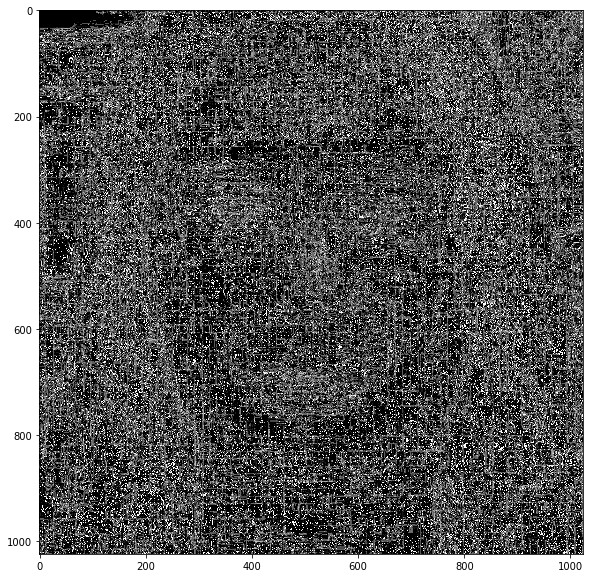

In [18]:
image = cv2.imread("data/extracted_00001.png")
res = ELA(image, 95, 30)
plt.figure(figsize=(10,10))
plt.imshow(res, cmap='gray')


In [19]:
hist, bins = np.histogram(res.flatten(), 256)

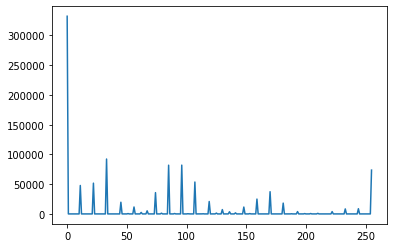

In [20]:
plt.plot(hist)

In [45]:
img = cv2.imread("data/extracted_00001.png")
img[:,:,0] = cv2.equalizeHist(img[:,:,0])
img[:,:,1] = cv2.equalizeHist(img[:,:,1])
img[:,:,2] = cv2.equalizeHist(img[:,:,2])
filtered = median_filter(img, size=5)

In [47]:
noise = img - filtered

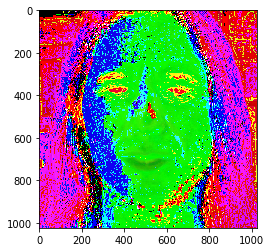

In [49]:
plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB))